In [259]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,Flatten
from sklearn.preprocessing import MinMaxScaler

# Normalize our columns
scaler = MinMaxScaler(feature_range=(0,1))
elev['PERF'] = scaler.fit_transform(elev[['PERF']])
elev['DATE'] = scaler.fit_transform(elev[['DATE']])

# Let's say you want to use 80% of your data for training and the rest for testing
split_point = int(len(elev) * 0.8)

train = elev.iloc[:split_point]
test = elev.iloc[split_point:]


# Prepare data for LSTM
X_train = train['DATE'].values
y_train = train['PERF'].values

X_test = test['DATE'].values
y_test = test['PERF'].values

X_train = X_train.reshape(-1,1,1)
X_test = X_test.reshape(-1,1,1)

# Clear session
tf.keras.backend.clear_session()

# Define LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')



best_model = tf.keras.callbacks.ModelCheckpoint(
    f'best_model{exo}.h5',
    monitor='val_loss', # Monitor other things like val_accuracy or accuracy 
    save_best_only='True', # Make sure to save only the best model
    verbose=1
)

# Fit model
history = model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=15, batch_size=5,callbacks=[best_model], verbose=1, shuffle=False)


Epoch 1/15
1/5 [=====>........................] - ETA: 42s - loss: 0.0492
Epoch 1: val_loss improved from inf to 0.48913, saving model to best_modelÉlévations latérales.h5
5/5 [==============================] - 13s 619ms/step - loss: 0.2566 - val_loss: 0.4891
Epoch 2/15
1/5 [=====>........................] - ETA: 0s - loss: 0.0399
Epoch 2: val_loss improved from 0.48913 to 0.39421, saving model to best_modelÉlévations latérales.h5


c:\Users\noahg\Documents\M2\ML_For_Production\mlops-workout\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 48ms/step - loss: 0.2186 - val_loss: 0.3942
Epoch 3/15
1/5 [=====>........................] - ETA: 0s - loss: 0.0263
Epoch 3: val_loss improved from 0.39421 to 0.21024, saving model to best_modelÉlévations latérales.h5
5/5 [==============================] - 0s 38ms/step - loss: 0.1537 - val_loss: 0.2102
Epoch 4/15
1/5 [=====>........................] - ETA: 0s - loss: 0.0173
Epoch 4: val_loss improved from 0.21024 to 0.02840, saving model to best_modelÉlévations latérales.h5
5/5 [==============================] - 0s 34ms/step - loss: 0.0629 - val_loss: 0.0284
Epoch 5/15
1/5 [=====>........................] - ETA: 0s - loss: 0.0678
Epoch 5: val_loss did not improve from 0.02840
5/5 [==============================] - 0s 19ms/step - loss: 0.0507 - val_loss: 0.0756
Epoch 6/15
5/5 [==============================] - ETA: 0s - loss: 0.0441
Epoch 6: val_loss improved from 0.02840 to 0.02812, saving model to best_modelÉlévations latérales.h5
5/5 [======

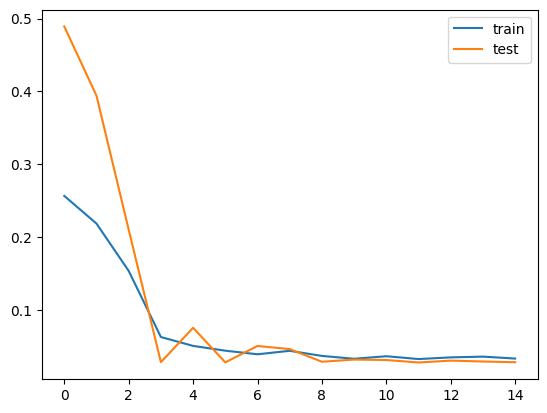

In [260]:
#Plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [261]:
from datetime import datetime

# Define a future date
future_date = '2024-02-07'

# Convert the future date to the same numerical format as your 'DATE' column
future_date = pd.to_datetime(future_date)
future_date = (future_date - min_date) / np.timedelta64(1,'D')

future_date_scaled = scaler.transform([[future_date]])

# Reshape the future date to match the input shape of your model
future_date_scaled = np.array([[future_date_scaled]])
future_date_scaled = future_date_scaled.reshape((future_date_scaled.shape[0], 1, future_date_scaled.shape[1]))

# Use the model to make a prediction
future_perf = model.predict(future_date_scaled)
# Transform the prediction back to the original scale
future_perf = scaler.inverse_transform(future_perf)

print(f"The predicted 'PERF' value for {future_date} is {future_perf}")


c:\Users\noahg\Documents\M2\ML_For_Production\mlops-workout\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 2s 2s/step
The predicted 'PERF' value for 309.0 is [[231.55441]]


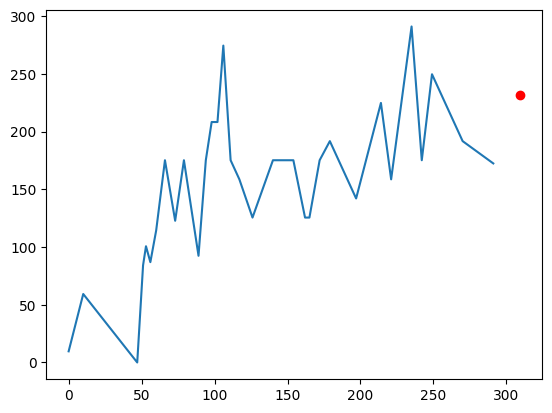

In [262]:
plt.plot(scaler.inverse_transform(elev['DATE'].values.reshape(-1, 1)), scaler.inverse_transform(elev['PERF'].values.reshape(-1, 1)))
plt.plot(future_date, future_perf[0], 'ro')
plt.show()